# clustering with kmeans

- Easy to use and iterate over
-we determine the number of clusters
-assumption made that the cluster will be circular
-scale your data kmeans uses distance
-inertia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import wrangle

In [2]:
sql_url = wrangle.get_connection('mall_customers')

In [3]:
query = '''
        SELECT *
        FROM customers
        '''

In [4]:
df = pd.read_sql(query, sql_url)
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
see = 42
train, test, val = wrangle.train_val_test(df)

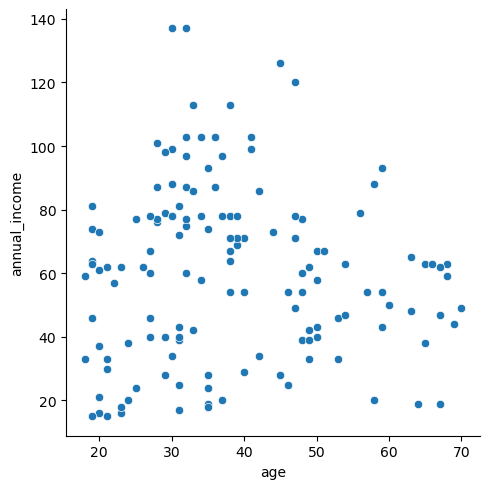

In [6]:
sns.relplot(data = train, x= 'age', y = 'annual_income')
plt.show()

In [7]:
x = train[['age', 'annual_income']]

In [8]:
kmeans = KMeans(n_clusters = 3)

kmeans.fit(x)

kmeans.predict(x)

array([1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 2,
       2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 0,
       1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2,
       1, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0,
       0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1,
       0, 1, 2, 2, 0, 2, 1, 2], dtype=int32)

In [9]:
x['unscaled_clusters'] = kmeans.predict(x)
x.head()

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_11778/3152595035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['unscaled_clusters'] = kmeans.predict(x)


,age,annual_income,unscaled_clusters
169,32,87,1
97,27,60,1
31,21,30,0
12,58,20,2
35,21,33,0


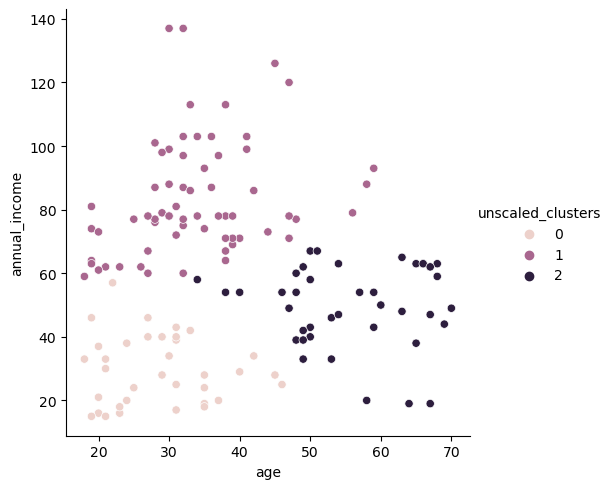

In [13]:
sns.relplot(data = x, x = 'age', y = 'annual_income', hue = 'unscaled_clusters')
plt.show()

In [15]:
mm_scaler = MinMaxScaler()

x[['age', 'annual_income']] = mm_scaler.fit_transform(x[['age', 'annual_income']])

x.head()

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_11778/1079316091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['age', 'annual_income']] = mm_scaler.fit_transform(x[['age', 'annual_income']])


,age,annual_income,unscaled_clusters
169,0.269231,0.590164,1
97,0.173077,0.368852,1
31,0.057692,0.122951,0
12,0.769231,0.040984,2
35,0.057692,0.147541,0


In [18]:
seed = 42
kmeans_scale = KMeans(n_clusters = 3, random_state = seed)

kmeans_scale.fit(x[['age', 'annual_income']])


KMeans(n_clusters=3, random_state=42)

In [19]:
x['scaled_clusters'] = kmeans_scale.predict(x[['age', 'annual_income' ]])

x.head()

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_11778/3308211682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['scaled_clusters'] = kmeans_scale.predict(x[['age', 'annual_income' ]])


,age,annual_income,unscaled_clusters,scaled_clusters
169,0.269231,0.590164,1,0
97,0.173077,0.368852,1,2
31,0.057692,0.122951,0,2
12,0.769231,0.040984,2,1
35,0.057692,0.147541,0,2


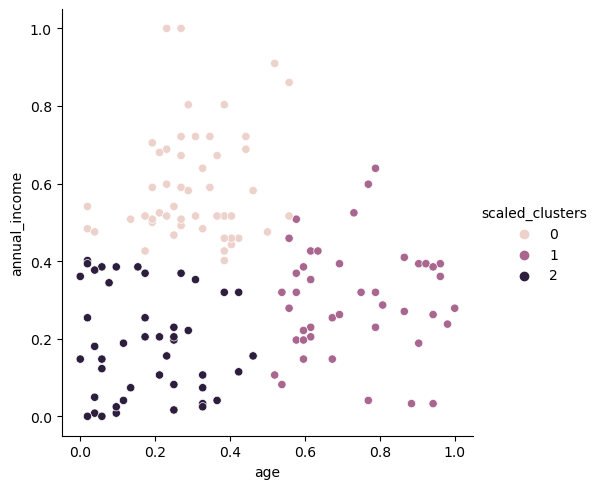

In [20]:
sns.relplot(data = x, x = 'age', y = 'annual_income', hue = 'scaled_clusters')
plt.show()

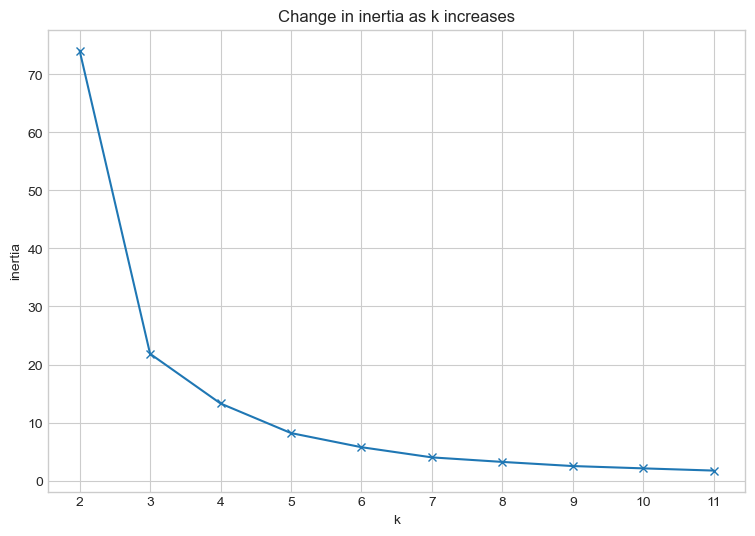

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(x).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

    plt.show()